# Importing & Installing Relevant Libraries

In [1]:
# !pip install python-docx
# # Install SHAP
# !pip install shap
#!pip install xgboost
# !pip install lightgbm
# !pip install catboost


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import catboost as cb
from docx import Document
from mord import LogisticAT


# Input Variables Initialization

In [3]:
#define file path for final merged dataset
file_path= r'D:\DICAR-Thesis+Internship\Final Dataset\Merged_Final_Dataset.xlsx'

# Define a threshold for the percentage of non-zero values required for each column. columns having non-zerovalues 
# less than the specified thresold percentage will be removed.
non_zero_val_threshold=1;


#define the specific columns that you want to remove
columns_to_remove = ['ID', 'TIMESTAMP [ms]', 'TIMESTAMP_INITIAL', 'TIMESTAMP_FINAL', 'ID_Semantic',  'ID_Line', 'line_full_id',
                     'line_osm_id', 'ID_Point', 'point_full_id', 'point_osm_id',  'ID_Polygon', 'polygon_full_id', 
                     'polygon_osm_id', 'poorSignal', 'delta', 'theta',  'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 
                     'lowGamma', 'midGamma', 'lon', 'lat',  'GLANCE_DURATION', 'T(Â°)', 'AngleX(deg)', 'AngleY(deg)', 
                     'AngleZ(deg)', 'Yaw',  'polygon_leisure', 'point_waste', 'line_smoothness', 'polygon_barrier', 
                     'line_wheelchair',  'line_osm_type', 'line_kerb', 'line_fence_type', 'polygon_addr_city', 
                     'line_temporary',  'point_kerb', 'polygon_roof_level', 'polygon_amenity', 'point_shop', 'point_osm_type', 
                     'polygon_source_add', 'point_railway', 'point_opening_ho', 'point_crossing_i',  'point_barrier',
                     'point_bicycle', 'point_lit', 'polygon_height', 'point_bollard',  'polygon_wheelchair', 
                     'polygon_historic', 'polygon_natural', 'point_bicycle_re',  'line_material', 'polygon_roof_heigh', 
                     'point_bicycle_pa', 'polygon_addr_stree',  'line_footway', 'line_maxspeed', 'line_height', 'point_bus', 
                     'line_lanes', 'line_sidewalk',  'point_entrance', 'polygon_addr_postc', 'line_cycleway']


# Set the desired explained variance threshold for retaining PCA components
variance_threshold = 0.95  # Change this value to adjust the threshold

# Feature Selection for Machine Learning

In [4]:
# Load the dataset
final_merged_df = pd.read_excel(file_path)

In [5]:
# Removing the specified columns
final_features = final_merged_df.drop(columns=columns_to_remove, errors='ignore')
# Display the first few rows of the cleaned dataset to confirm
final_features.head()

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,line_surface,line_barrier,line_segregated,point_amenity,point_natural,point_traffic_si,point_highway,point_crossing,polygon_building,polygon_landuse
0,0,2,7,2,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,9,7,9,6,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
2,1,13,1,1,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
3,1,13,1,1,1,1,0,1,1,0,...,0,0,0,2,0,0,0,0,0,0
4,1,13,1,13,1,1,1,1,0,0,...,0,0,0,2,0,0,0,0,0,0


### Removing columns with non-zero values less than threshold percentage

In [6]:
# Calculate the percentage of non-zero values for each column
non_zero_percentage = (final_features != 0).sum(axis=0) / len(final_features) * 100

# Identify columns with non-zero values less than threshold percentage
columns_to_remove = non_zero_percentage[non_zero_percentage < non_zero_val_threshold].index.tolist()

# Remove the identified columns
final_features_cleaned = final_features.drop(columns=columns_to_remove)

# Display the first few rows of the cleaned dataset to confirm
columns_to_remove

['Shape_train', 'line_sidewalk_r', 'line_sidewalk_l']

In [7]:
final_features_cleaned.head()

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,line_surface,line_barrier,line_segregated,point_amenity,point_natural,point_traffic_si,point_highway,point_crossing,polygon_building,polygon_landuse
0,0,2,7,2,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,9,7,9,6,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
2,1,13,1,1,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
3,1,13,1,1,1,1,0,1,1,0,...,0,0,0,2,0,0,0,0,0,0
4,1,13,1,13,1,1,1,1,0,0,...,0,0,0,2,0,0,0,0,0,0


# Smoothing specific features with moving average

In [8]:
import pandas as pd

# Function to apply moving average to sensor data and remove non-smoothed versions
def apply_moving_average(df, sensor_columns, window_size=5):
    # Apply moving average and create smoothed columns
    for col in sensor_columns:
        df[col + '_smoothed'] = df[col].rolling(window=window_size).mean()  # Moving average of 5 rows

    # Drop rows with NaN values after applying moving average
    df = df.dropna().reset_index(drop=True)
    
    # Drop the original non-smoothed sensor columns
    df = df.drop(columns=sensor_columns)

    return df

# List of sensor columns
sensor_columns = ['ax(g)', 'ay(g)', 'az(g)', 'wx(deg/s)', 'wy(deg/s)', 'wz(deg/s)']

# Apply moving average to sensor data and remove non-smoothed columns
final_features_cleaned = apply_moving_average(final_features_cleaned, sensor_columns)


In [9]:
final_features_cleaned

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,point_highway,point_crossing,polygon_building,polygon_landuse,ax(g)_smoothed,ay(g)_smoothed,az(g)_smoothed,wx(deg/s)_smoothed,wy(deg/s)_smoothed,wz(deg/s)_smoothed
0,1,13,1,13,1,1,1,1,0,0,...,0,0,0,0,-0.056207,-0.157501,0.986738,0.206663,0.021623,-0.072454
1,1,13,1,13,1,1,1,1,0,0,...,0,0,0,0,-0.061837,-0.169617,0.986543,-0.039072,0.015070,-0.091429
2,1,7,1,7,1,0,0,1,1,0,...,0,0,0,0,-0.063182,-0.175831,0.985599,-0.142748,0.000187,-0.077611
3,1,7,1,7,1,1,0,1,1,0,...,0,0,0,0,-0.060796,-0.183280,0.984660,-0.179480,-0.003603,-0.050753
4,1,7,1,7,1,1,0,1,1,0,...,0,0,0,0,-0.064334,-0.187434,0.983553,-0.199674,-0.003776,0.061417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.067381,-0.170530,0.982147,0.000000,0.000000,0.000000
11096,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.067447,-0.169724,0.981546,0.000000,0.000000,0.000000
11097,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.068358,-0.167979,0.980923,0.000000,0.000000,0.000000
11098,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.069412,-0.163953,0.979888,0.000000,0.000000,0.000000


In [10]:
# Get the list of column names in the DataFrame
columns_list1 = final_features_cleaned.columns.tolist()

# Display the column names horizontally
print(" | ".join(columns_list1))

ID_Glance | ID_GAZE_CLASS | GAZE_QUADRANT | ID_NEW_SEMANTIC_OBJ_CLASS | NEW_SEMANTIC_OBJ_QUADRANT | Binary_Scene_road | Binary_Scene_sidewalk | Binary_Scene_building | Binary_Scene_wall | Binary_Scene_fence | Binary_Scene_pole | Binary_Scene_traffic light | Binary_Scene_traffic sign | Binary_Scene_vegetation | Binary_Scene_terrain | Binary_Scene_sky | Binary_Scene_person | Binary_Scene_rider | Binary_Scene_car | Binary_Scene_truck | Binary_Scene_bus | Binary_Scene_train | Binary_Scene_motorcycle | Binary_Scene_bicycle | Shape_road | Shape_sidewalk | Shape_building | Shape_wall | Shape_fence | Shape_pole | Shape_traffic light | Shape_traffic sign | Shape_vegetation | Shape_terrain | Shape_sky | Shape_person | Shape_rider | Shape_car | Shape_truck | Shape_bus | Shape_motorcycle | Shape_bicycle | meditation | attention | Speed | polygon_osm_type | line_highway | line_foot | line_bicycle | line_service | line_surface | line_barrier | line_segregated | point_amenity | point_natural | point_

# Applying PCA

Number of PCA components retained: 9


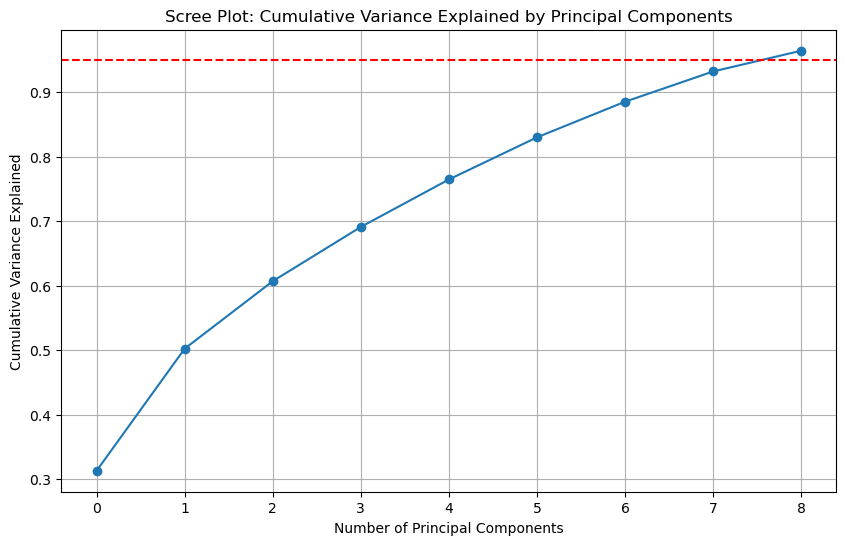

Final combined dataset with PCA-transformed map features and original sensor data:
   ID_Glance  ID_GAZE_CLASS  GAZE_QUADRANT  ID_NEW_SEMANTIC_OBJ_CLASS  \
0          1             13              1                         13   
1          1             13              1                         13   
2          1              7              1                          7   
3          1              7              1                          7   
4          1              7              1                          7   

   NEW_SEMANTIC_OBJ_QUADRANT  Binary_Scene_road  Binary_Scene_sidewalk  \
0                          1                  1                      1   
1                          1                  1                      1   
2                          1                  0                      0   
3                          1                  1                      0   
4                          1                  1                      0   

   Binary_Scene_building  Binary_

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Separate the dataset into map features (starting with point_, line_, Polygon_) and sensor features (remaining features)
def separate_datasets(df):
    # Separate map features
    map_columns = [col for col in df.columns if col.startswith(('point_', 'line_', 'polygon_'))]
    map_df = df[map_columns]

    # Remaining features will be considered as sensor data
    sensor_df = df.drop(columns=map_columns)
    
    return map_df, sensor_df

# Step 2: Apply PCA on map data and retain components explaining 99% variability
def apply_pca_on_map(map_df, variance_threshold=0.99):
    # Standardize the map data
    scaler = StandardScaler()
    scaled_map_features = scaler.fit_transform(map_df)
    
    # Apply PCA
    pca = PCA(n_components=variance_threshold)
    map_features_pca = pca.fit_transform(scaled_map_features)

    # Display the number of components retained
    n_components_retained = pca.n_components_
    print(f"Number of PCA components retained: {n_components_retained}")
    
    # Scree plot for PCA
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Threshold')
    plt.title('Scree Plot: Cumulative Variance Explained by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid(True)
    plt.show()

    # Return PCA-transformed map data and PCA model
    return map_features_pca, pca

# Step 3: Combine PCA-transformed map features with sensor data
def combine_pca_and_sensor_data(sensor_df, map_features_pca):
    # Convert PCA components to DataFrame
    pca_df = pd.DataFrame(map_features_pca, columns=[f'PC{i+1}' for i in range(map_features_pca.shape[1])])
    
    # Combine sensor data and PCA components
    final_combined_df = pd.concat([sensor_df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
    
    return final_combined_df

# Example usage:
# Assuming final_features_cleaned is your final dataset
map_df, sensor_df = separate_datasets(final_features_cleaned)  # Step 1: Separate the datasets

# Step 2: Apply PCA to map data and retain components explaining specified variance
map_features_pca, pca_model = apply_pca_on_map(map_df, variance_threshold)

# Step 3: Combine PCA components with the original sensor data
final_combined_data = combine_pca_and_sensor_data(sensor_df, map_features_pca)

# Verify the final result
print("Final combined dataset with PCA-transformed map features and original sensor data:")
print(final_combined_data.head())


In [12]:
# Get the list of column names in the DataFrame
columns_list2 = final_combined_data.columns.tolist()

# Display the column names horizontally
print(" | ".join(columns_list2))

ID_Glance | ID_GAZE_CLASS | GAZE_QUADRANT | ID_NEW_SEMANTIC_OBJ_CLASS | NEW_SEMANTIC_OBJ_QUADRANT | Binary_Scene_road | Binary_Scene_sidewalk | Binary_Scene_building | Binary_Scene_wall | Binary_Scene_fence | Binary_Scene_pole | Binary_Scene_traffic light | Binary_Scene_traffic sign | Binary_Scene_vegetation | Binary_Scene_terrain | Binary_Scene_sky | Binary_Scene_person | Binary_Scene_rider | Binary_Scene_car | Binary_Scene_truck | Binary_Scene_bus | Binary_Scene_train | Binary_Scene_motorcycle | Binary_Scene_bicycle | Shape_road | Shape_sidewalk | Shape_building | Shape_wall | Shape_fence | Shape_pole | Shape_traffic light | Shape_traffic sign | Shape_vegetation | Shape_terrain | Shape_sky | Shape_person | Shape_rider | Shape_car | Shape_truck | Shape_bus | Shape_motorcycle | Shape_bicycle | meditation | attention | Speed | ax(g)_smoothed | ay(g)_smoothed | az(g)_smoothed | wx(deg/s)_smoothed | wy(deg/s)_smoothed | wz(deg/s)_smoothed | PC1 | PC2 | PC3 | PC4 | PC5 | PC6 | PC7 | PC8 | 

## Creating DataFrame for target variable

In [13]:
# Create DataFrames for  target variable
final_feat_glance_id = final_combined_data.drop(columns=['meditation','attention'])

In [14]:
final_feat_glance_id

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,wz(deg/s)_smoothed,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1,13,1,13,1,1,1,1,0,0,...,-0.072454,2.770394,0.293004,-1.276197,1.010049,0.680150,-0.159612,-0.726605,-0.786104,-0.138957
1,1,13,1,13,1,1,1,1,0,0,...,-0.091429,2.770394,0.293004,-1.276197,1.010049,0.680150,-0.159612,-0.726605,-0.786104,-0.138957
2,1,7,1,7,1,0,0,1,1,0,...,-0.077611,2.770394,0.293004,-1.276197,1.010049,0.680150,-0.159612,-0.726605,-0.786104,-0.138957
3,1,7,1,7,1,1,0,1,1,0,...,-0.050753,2.770394,0.293004,-1.276197,1.010049,0.680150,-0.159612,-0.726605,-0.786104,-0.138957
4,1,7,1,7,1,1,0,1,1,0,...,0.061417,2.770394,0.293004,-1.276197,1.010049,0.680150,-0.159612,-0.726605,-0.786104,-0.138957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,1,14,1,14,1,1,1,1,0,1,...,0.000000,3.047224,-0.019156,-1.341561,0.828046,-0.539934,0.242008,0.430114,1.161241,0.070241
11096,1,14,1,14,1,1,1,1,0,1,...,0.000000,3.047224,-0.019156,-1.341561,0.828046,-0.539934,0.242008,0.430114,1.161241,0.070241
11097,1,14,1,14,1,1,1,1,0,1,...,0.000000,3.047224,-0.019156,-1.341561,0.828046,-0.539934,0.242008,0.430114,1.161241,0.070241
11098,1,14,1,14,1,1,1,1,0,1,...,0.000000,3.047224,-0.019156,-1.341561,0.828046,-0.539934,0.242008,0.430114,1.161241,0.070241


# Applying Machine Learning Algorithms for ID_Glance

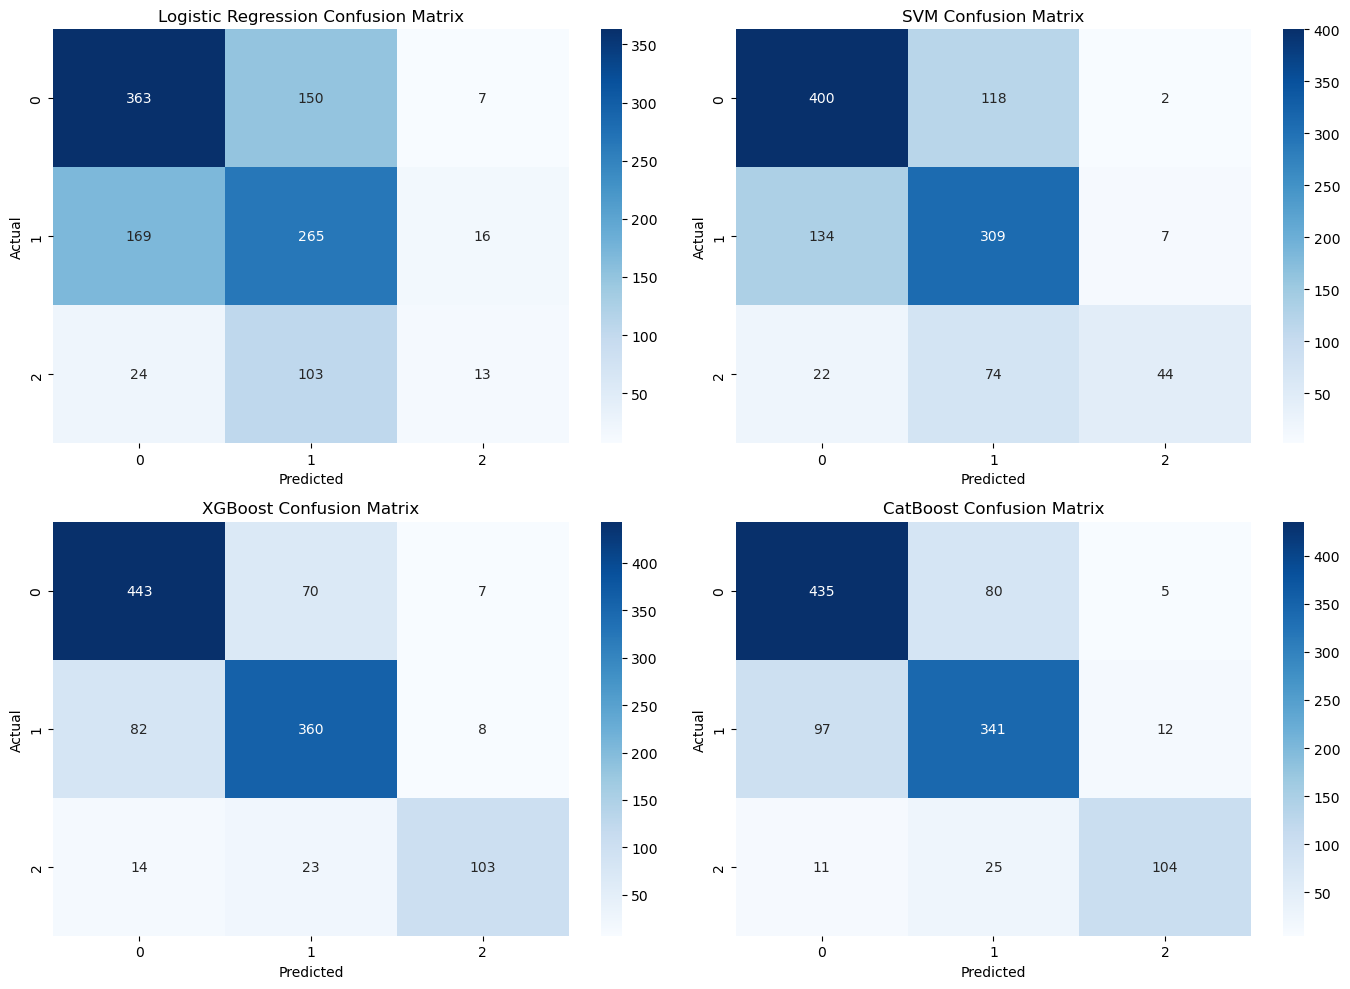

Logistic Regression Accuracy: 0.5774774774774775
SVM Accuracy: 0.6783783783783783
XGBoost Accuracy: 0.8162162162162162
CatBoost Accuracy: 0.7927927927927928
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       520
           1       0.51      0.59      0.55       450
           2       0.36      0.09      0.15       140

    accuracy                           0.58      1110
   macro avg       0.51      0.46      0.46      1110
weighted avg       0.56      0.58      0.56      1110

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       520
           1       0.62      0.69      0.65       450
           2       0.83      0.31      0.46       140

    accuracy                           0.68      1110
   macro avg       0.72      0.59      0.62      1110
weighted avg       0.69      0.68      0.67      1110

XGBoost C

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Step 1: Extract features and target variable from final_feat_glance_id
X_glance_id = final_feat_glance_id.drop(columns=['ID_Glance'])
y_glance_id = final_feat_glance_id['ID_Glance']

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_glance_id)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_glance_id, test_size=0.1, stratify=y_glance_id, random_state=1)

# Step 4: Train models

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# SVM (standard SVM for classification)
svm = SVC(probability=True, kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# XGBoost (standard XGBoost for classification)
xgb_classifier = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    min_child_weight=4
)

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# CatBoost (using default parameters)
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X_train, y_train)
y_pred_catboost = catboost_classifier.predict(X_test)

# Visualization and Metrics
plt.figure(figsize=(14, 10))  # Adjusting size for a 2x2 grid of plots

# Logistic Regression Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM Confusion Matrix
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# XGBoost Confusion Matrix
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# CatBoost Confusion Matrix
plt.subplot(2, 2, 4)
sns.heatmap(confusion_matrix(y_test, y_pred_catboost), annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

# Print accuracy and classification reports
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))

# Applying SHAP to Trained XGBoost  Model for ID_Glance

Shape of X_test_limited: (1110, 57)
Shape of SHAP values (class 0): (57, 3)


Reformatted SHAP values shape: (1110, 57, 3)
SHAP Summary Plot for XGBBoost (Class 0):


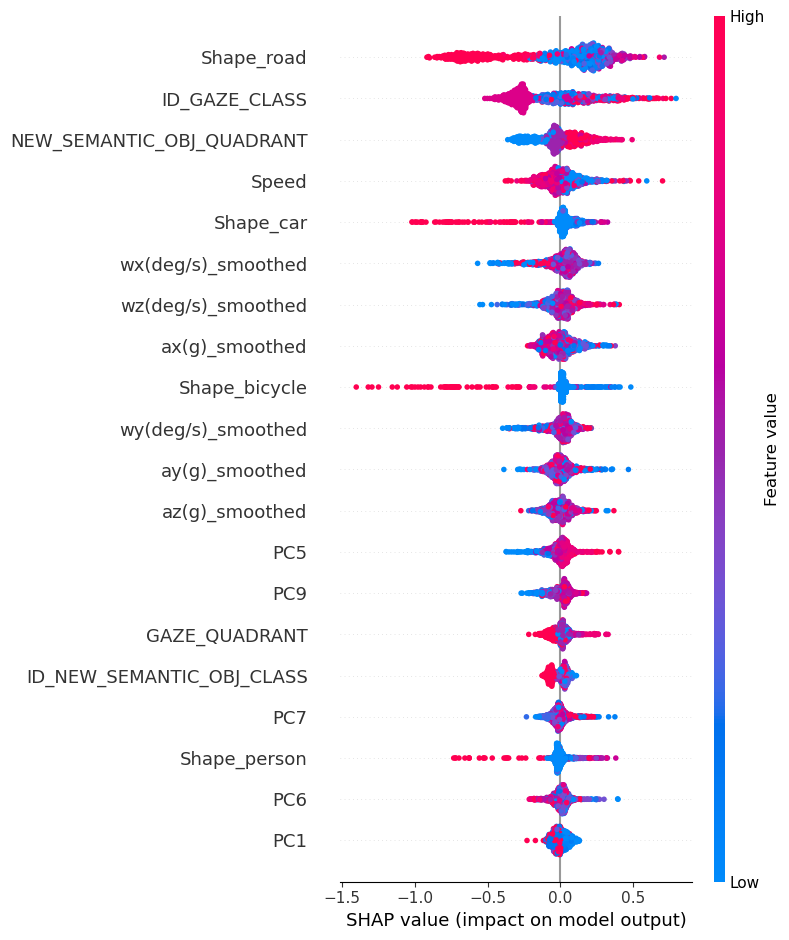

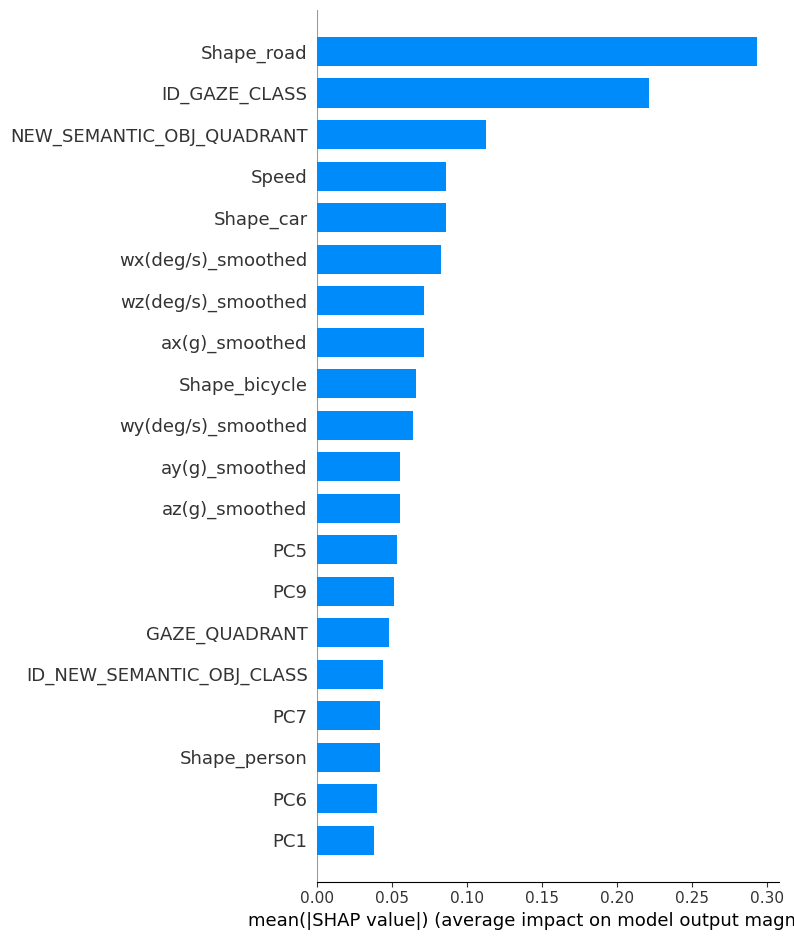

SHAP Summary Plot for XGBBoost (Class 1):


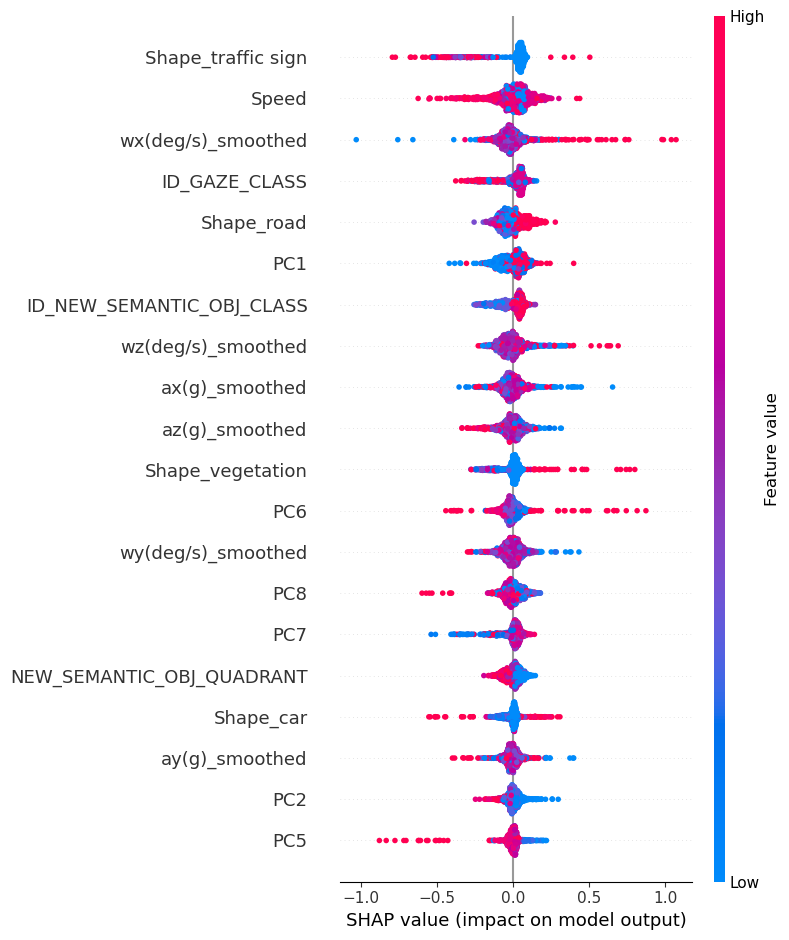

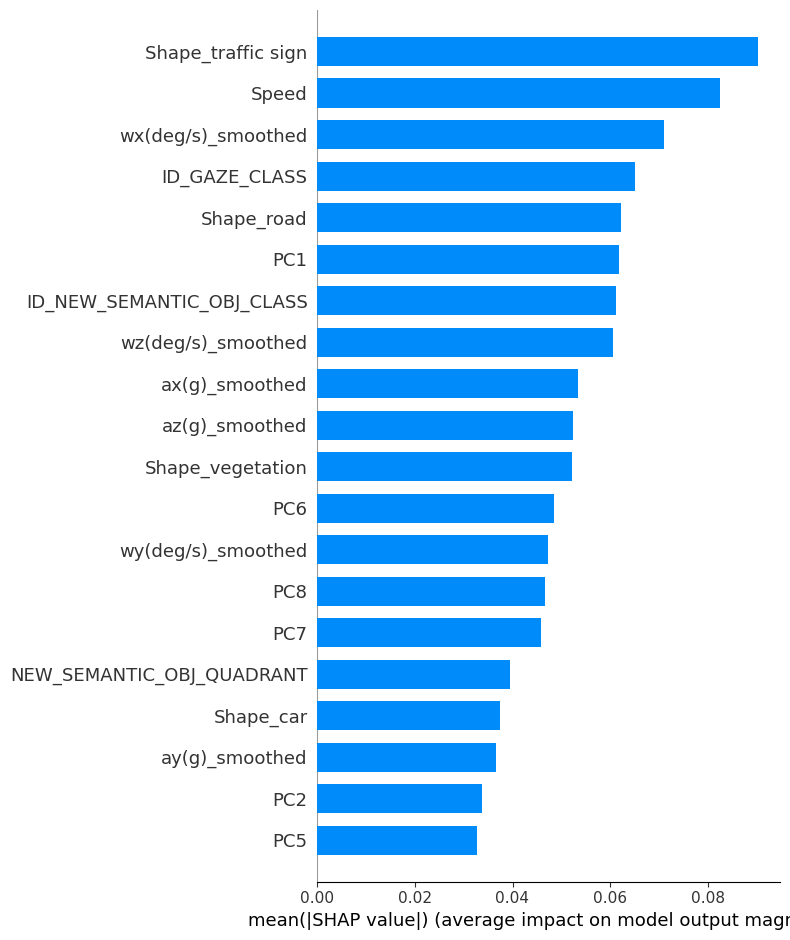

SHAP Summary Plot for XGBBoost (Class 2):


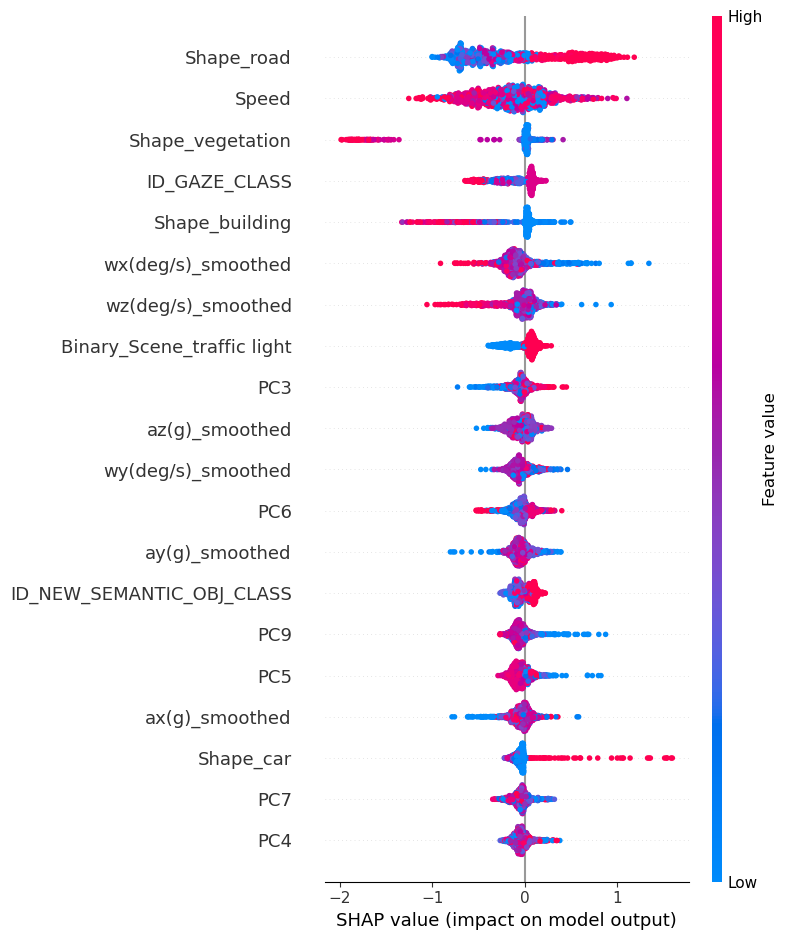

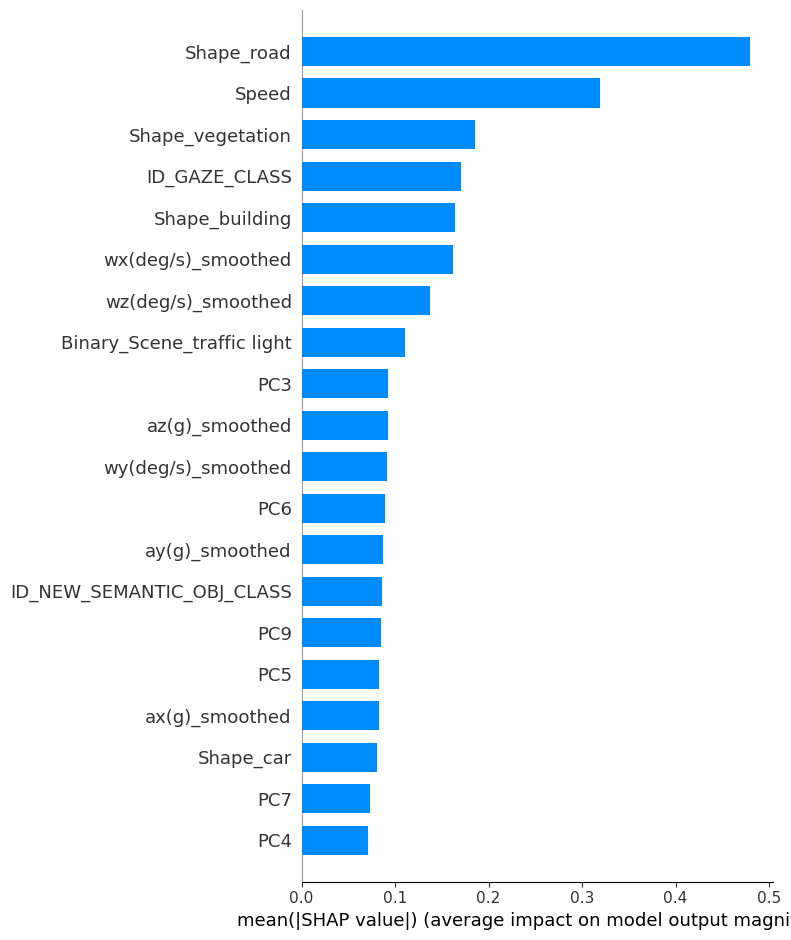

In [16]:
import shap
import numpy as np
import matplotlib.pyplot as plt


X_test_limited = X_test
y_test_limited = y_test

# Initialize the SHAP explainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_classifier)

# Calculate SHAP values for the test set
shap_values_xgb = explainer_xgb.shap_values(X_test_limited)

# Check the shape of the test set and SHAP values to ensure they match
print("Shape of X_test_limited:", X_test_limited.shape)
print("Shape of SHAP values (class 0):", shap_values_xgb[0].shape)

# Use actual feature names from X_glance_id (features after preprocessing)
feature_names = X_glance_id.columns

# Initialize SHAP visualization tools
shap.initjs()

# Convert SHAP values from list of arrays to a numpy array with shape (1111, 75, 3)
shap_values_xgb = np.array(shap_values_xgb)

# Ensure shapes are consistent
print("Reformatted SHAP values shape:", shap_values_xgb.shape)  

# Visualization for sHAP eXPLAINATIONS
for class_idx in range(3):
    print(f"SHAP Summary Plot for XGBBoost (Class {class_idx}):")
    shap.summary_plot(shap_values_xgb[:, :, class_idx], X_test_limited, feature_names=feature_names)
    shap.summary_plot(shap_values_xgb[:, :, class_idx], X_test_limited, feature_names=feature_names, plot_type="bar")



### Top influential features across all classes and instances


Top 15 Features by Total Influence Across All Instances and Classes:
Shape_road: 927.3980
Speed: 540.8636
ID_GAZE_CLASS: 507.5917
wx(deg/s)_smoothed: 350.1219
Shape_vegetation: 303.2137
wz(deg/s)_smoothed: 299.5958
NEW_SEMANTIC_OBJ_QUADRANT: 241.7786
Shape_building: 234.3833
ax(g)_smoothed: 230.3473
Shape_car: 225.9184
wy(deg/s)_smoothed: 224.4737
az(g)_smoothed: 221.3361
ID_NEW_SEMANTIC_OBJ_CLASS: 211.6687
ay(g)_smoothed: 198.1180
PC6: 197.5533


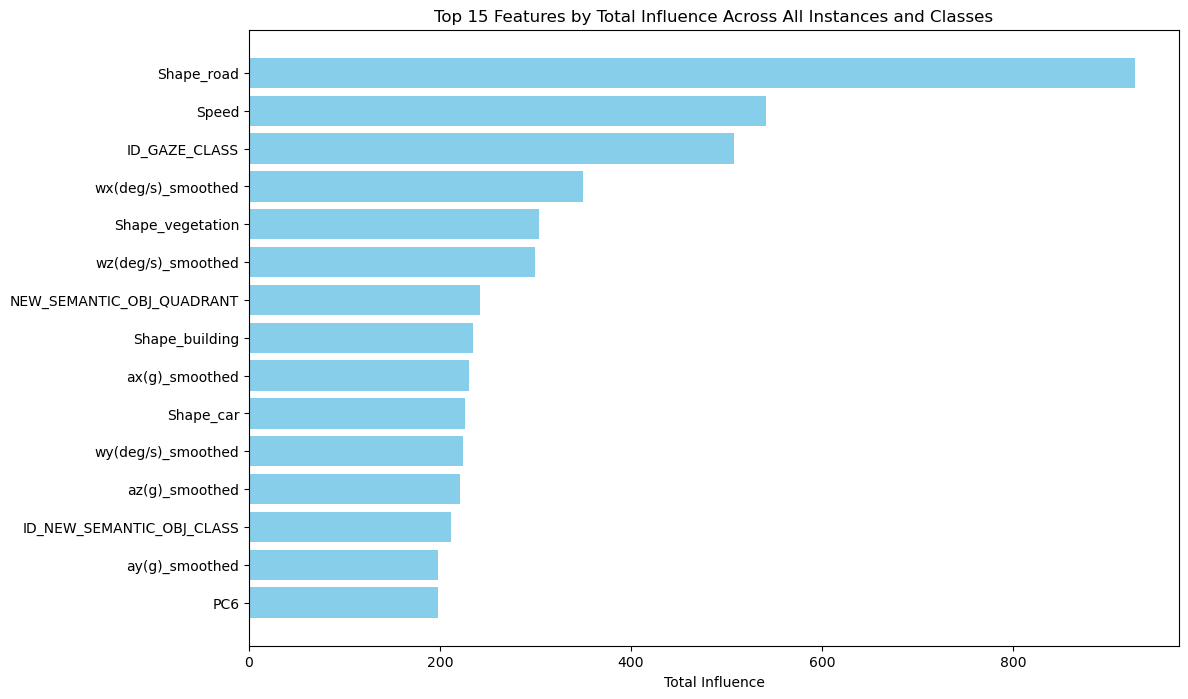

In [17]:
import matplotlib.pyplot as plt

# Calculate total influence across all instances and classes by summing absolute SHAP values
# across both instances and classes
total_influence = np.sum(np.abs(shap_values_xgb), axis=(0, 2))

# Create a dictionary of feature influence
feature_influence = {feature_names[i]: total_influence[i] for i in range(len(feature_names))}

# Sort the dictionary by influence in descending order
sorted_feature_influence = dict(sorted(feature_influence.items(), key=lambda item: item[1], reverse=True))

# Extract the top 15 features based on total influence
top_15_features = list(sorted_feature_influence.items())[:15]

# Print the top 15 features by total influence
print("\nTop 15 Features by Total Influence Across All Instances and Classes:")
for feature, influence in top_15_features:
    print(f"{feature}: {influence:.4f}")

# Create a horizontal bar chart for the top 15 features
features = [item[0] for item in top_15_features]  # Feature names
influences = [item[1] for item in top_15_features]  # Influence values

# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(features, influences, color='skyblue')
plt.xlabel('Total Influence')
plt.title('Top 15 Features by Total Influence Across All Instances and Classes')
plt.gca().invert_yaxis()  # Invert y-axis to show the most influential feature at the top
plt.show()


## Features Contributions to PCs

Top 8 Features Contributing to PC6:
point_natural       0.541847
point_amenity       0.501459
line_barrier        0.485469
polygon_building   -0.331997
line_service        0.230985
polygon_landuse     0.152096
polygon_osm_type   -0.122007
line_highway        0.086220
Name: PC6, dtype: float64


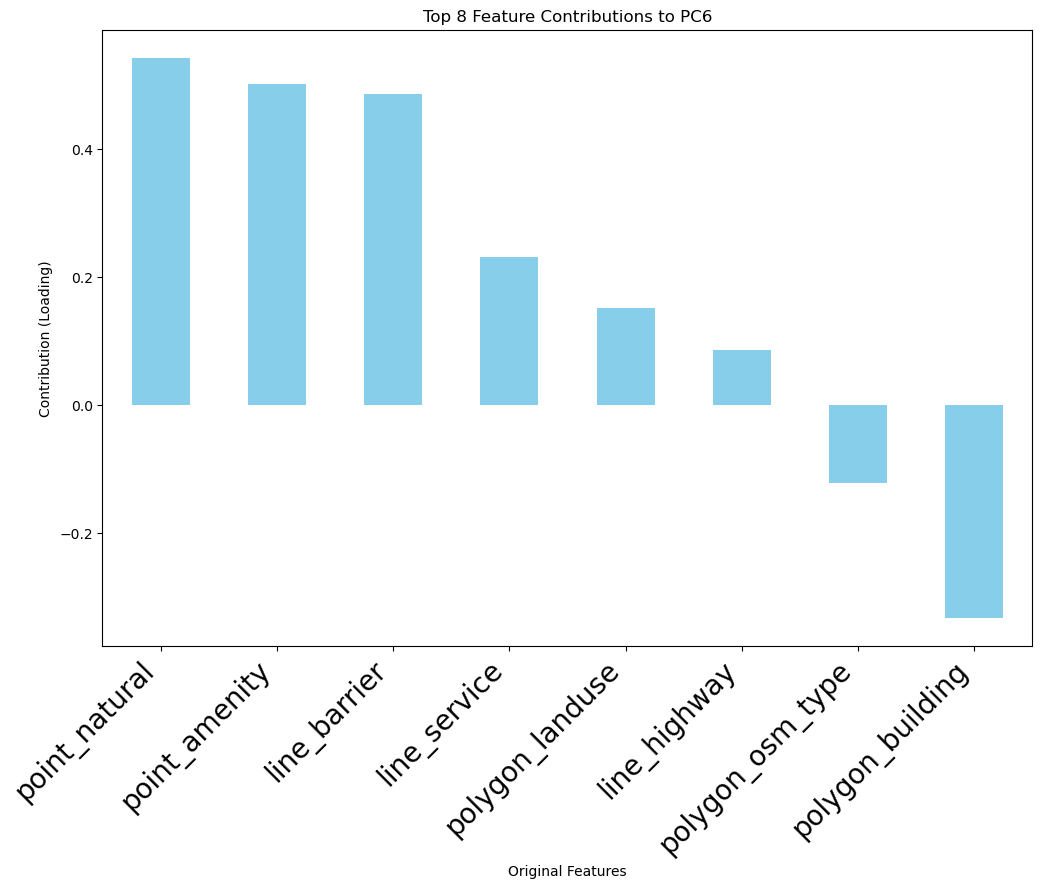

Top 8 Features Contributing to PC5:
line_service       -0.640238
point_natural       0.548899
line_barrier       -0.440494
line_surface       -0.141490
point_amenity       0.130119
point_crossing     -0.122699
point_highway      -0.109740
point_traffic_si    0.089309
Name: PC5, dtype: float64


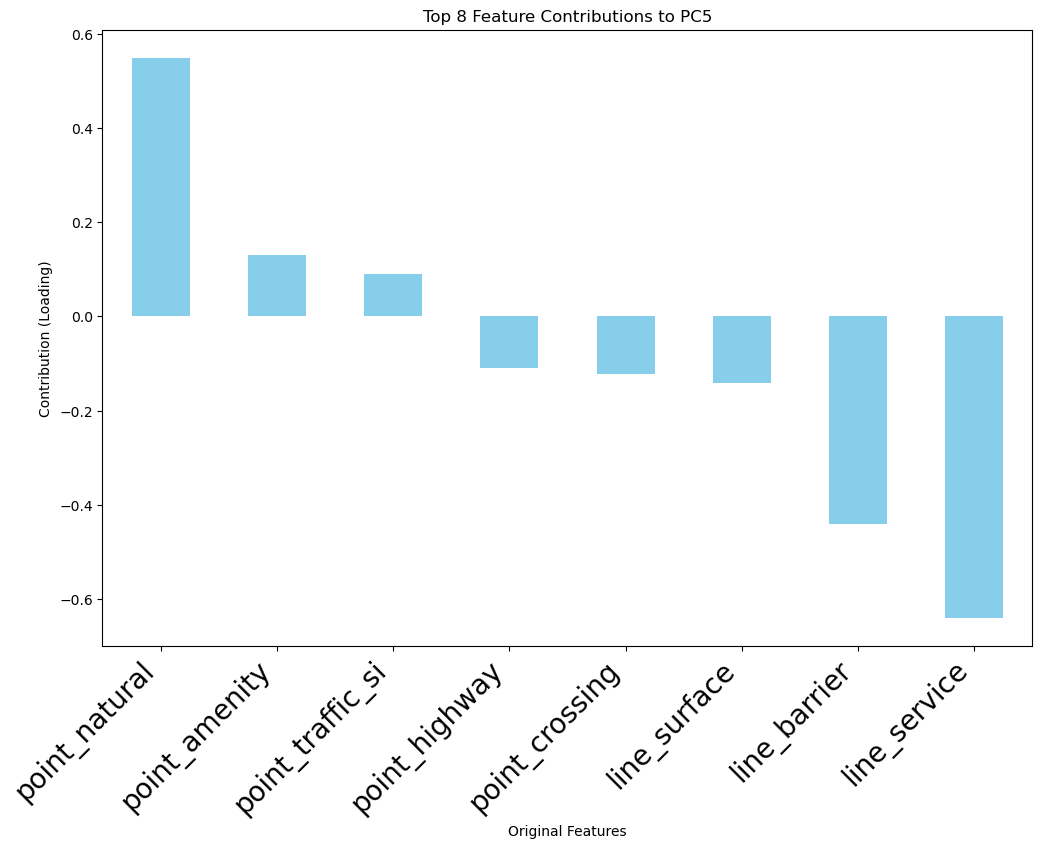

Top 6 Features Contributing to PC1:
line_bicycle       -0.447723
line_foot          -0.447699
line_segregated    -0.446556
line_highway       -0.402326
line_surface       -0.395622
polygon_building   -0.205284
Name: PC1, dtype: float64


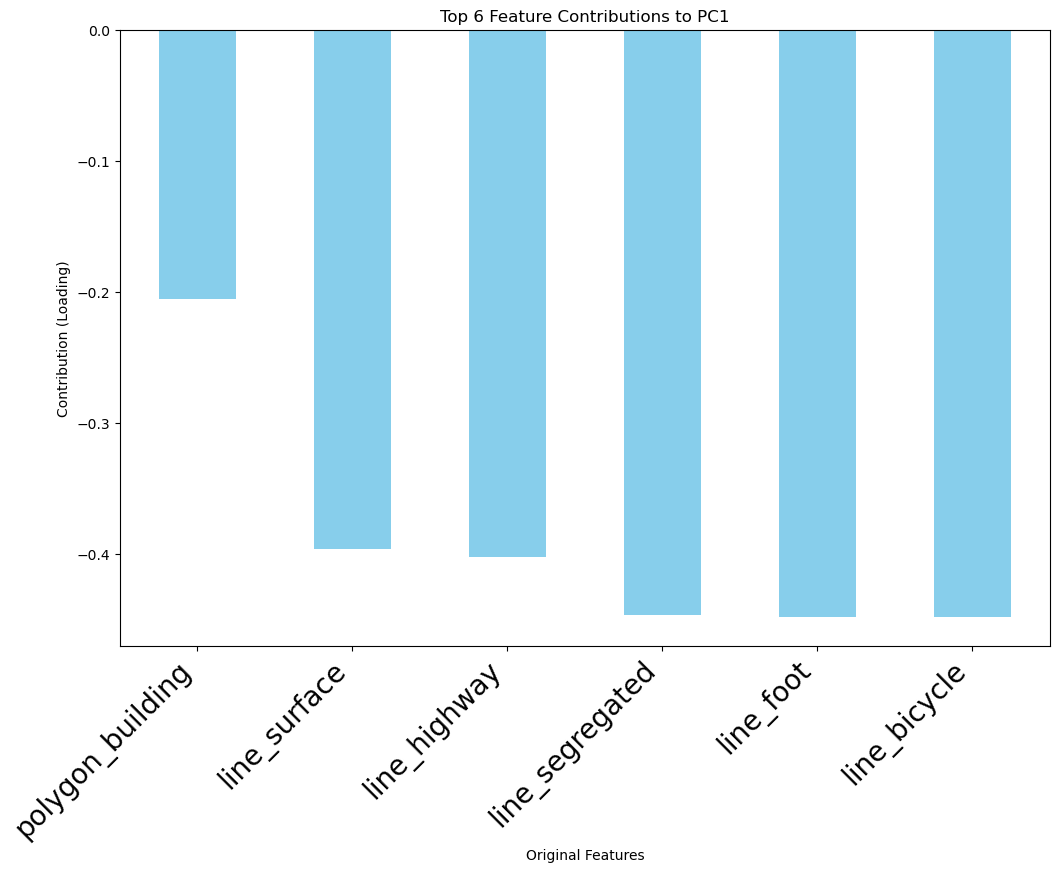

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the PCA components from the PCA model
pca_components_df = pd.DataFrame(pca_model.components_.T, columns=[f'PC{i+1}' for i in range(pca_model.n_components_)], index=map_df.columns)

# Now you can use this `pca_components_df` to visualize the feature contributions for any PC.

def plot_top_n_features_contributing_to_pc(pca_components_df, pc_number=1, n_features=15):
    """
    Plots the top N features contributing to a specified principal component, showing the sign of the contributions.

    :param pca_components_df: DataFrame containing PCA components (loadings).
    :param pc_number: The principal component number to analyze (e.g., 1 for PC1).
    :param n_features: The number of top contributing features to display.
    """
    # Construct the label for the specified PC
    pc_label = f'PC{pc_number}'

    # Get the top N features by their absolute contribution, but keep the original sign
    top_n_features = pca_components_df[pc_label].abs().sort_values(ascending=False).head(n_features)
    top_n_features = pca_components_df[pc_label].loc[top_n_features.index]

    # Display the top N features contributing to the selected PC with their signs
    print(f"Top {n_features} Features Contributing to {pc_label}:")
    print(top_n_features)

    # Bar plot to visualize the contributions of the top N features
    plt.figure(figsize=(12, 8))
    top_n_features.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f'Top {n_features} Feature Contributions to {pc_label}')
    plt.xlabel('Original Features')
    plt.ylabel('Contribution (Loading)')
    plt.xticks(rotation=45, ha='right', fontsize=20)
    plt.show()

# Example usage: plot the top 15 features contributing to Pcs
plot_top_n_features_contributing_to_pc(pca_components_df, pc_number=6, n_features=8)
plot_top_n_features_contributing_to_pc(pca_components_df, pc_number=5, n_features=8)
plot_top_n_features_contributing_to_pc(pca_components_df, pc_number=1, n_features=6)

## Mapping PC loading back to original Map features and explain the influence of individual Map features using SHAP Summary - ID_Glance

Shape of scaled_map_features_test: (1110, 15)
Mapped SHAP values shape: (1110, 15, 3)
SHAP Summary Plot for Original Map Features (Class 0):


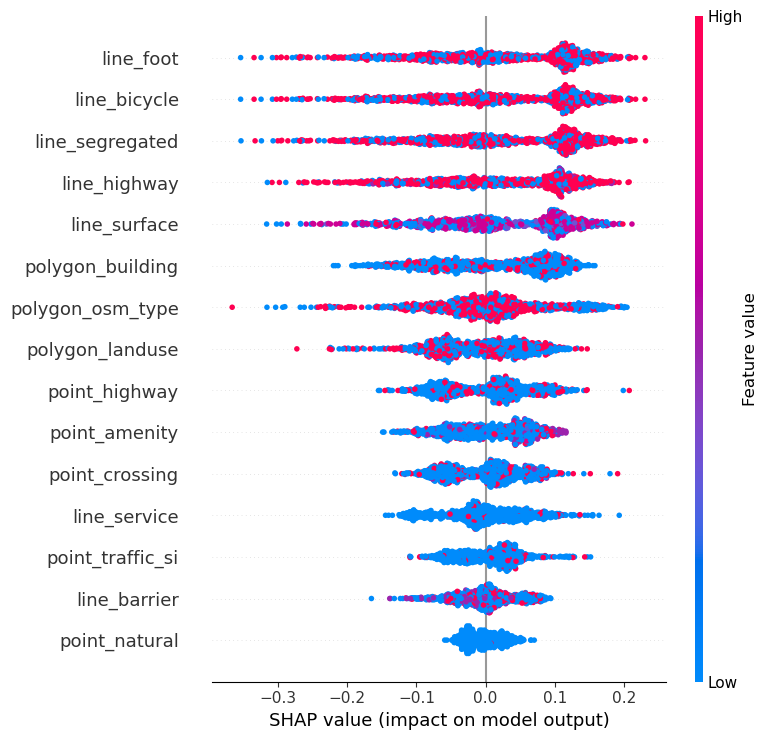

SHAP Bar Plot for Original Map Features (Class 0):


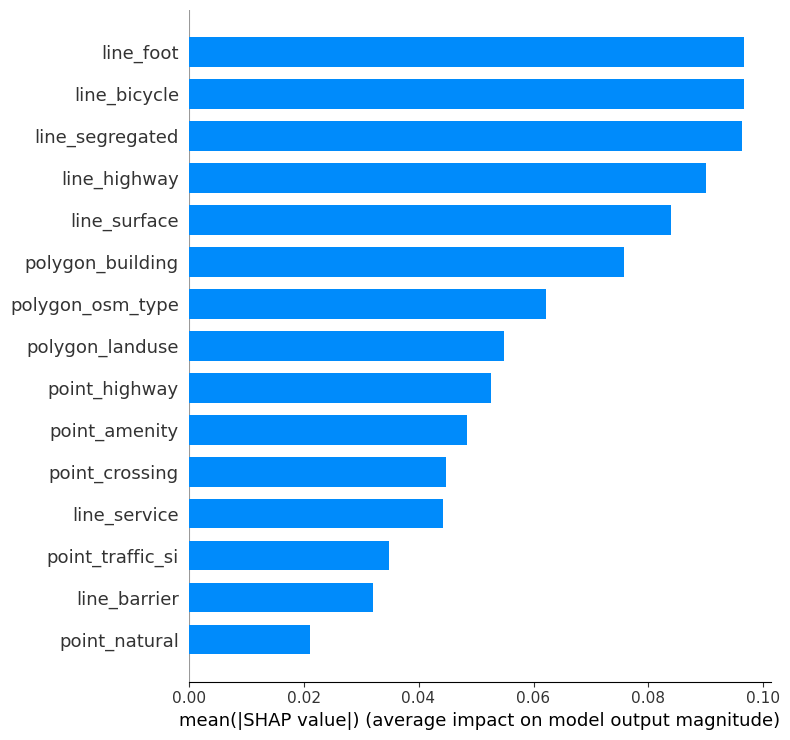

SHAP Summary Plot for Original Map Features (Class 1):


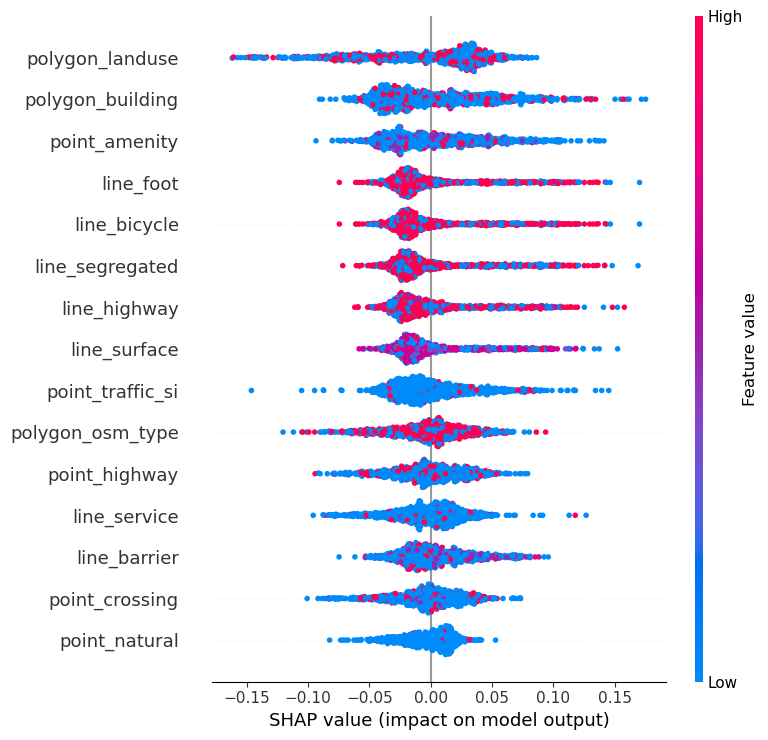

SHAP Bar Plot for Original Map Features (Class 1):


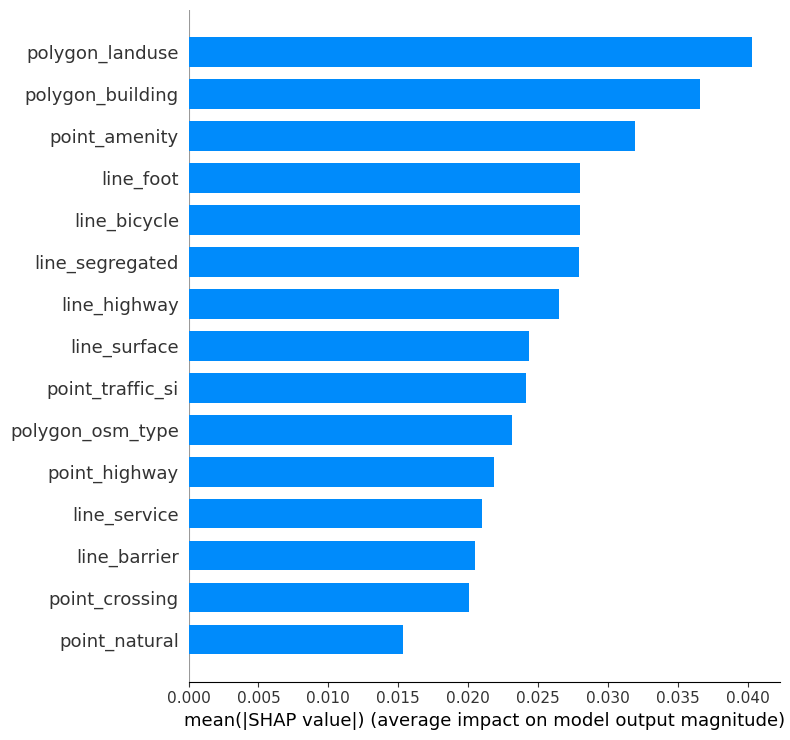

SHAP Summary Plot for Original Map Features (Class 2):


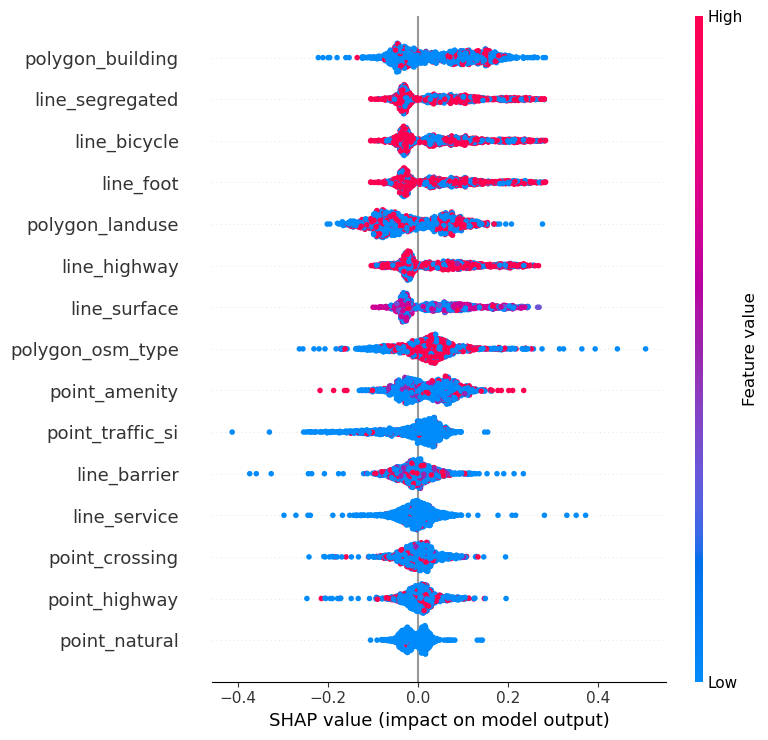

SHAP Bar Plot for Original Map Features (Class 2):


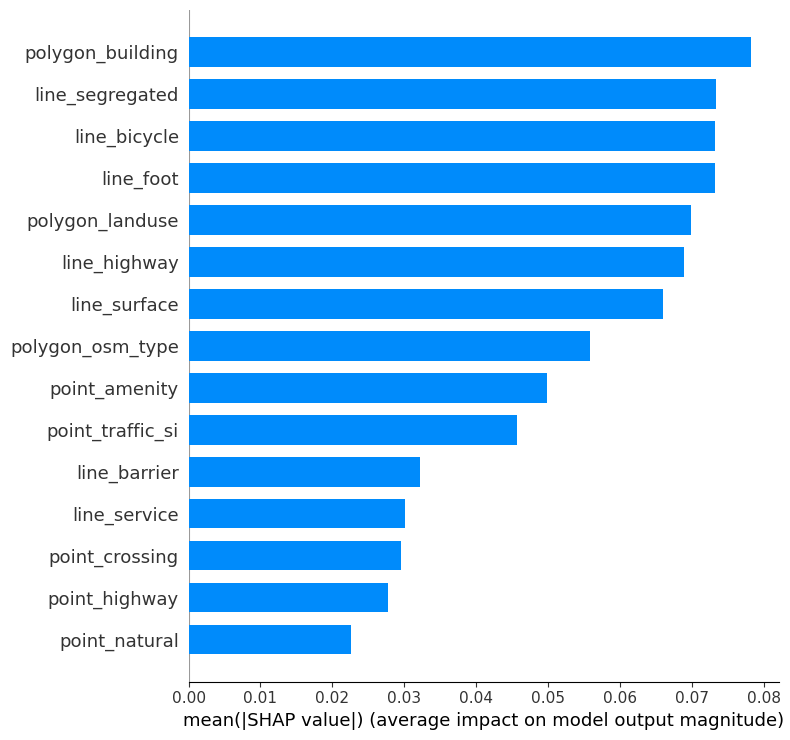

In [19]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pca_model contains PCA for map features and map_df contains original map features
n_pca_components = pca_model.components_.shape[0]  # Number of PCA components

# Separate SHAP values for PCA components from SHAP values for sensor features
shap_values_pca = shap_values_xgb[:, :n_pca_components, :]  # Extract only the SHAP values for PCA components

# Initialize an array to store SHAP values mapped back to original map features for each class
shap_values_mapped_back = np.zeros((shap_values_pca.shape[0], pca_model.components_.shape[1], shap_values_pca.shape[2]))  # Shape: (n_samples, n_map_features, n_classes)

# Loop through each class and map SHAP values back to original map features
for class_idx in range(shap_values_pca.shape[2]):
    shap_values_class = shap_values_pca[:, :, class_idx]  # SHAP values for the PCA components
    # Map SHAP values back to original map features using the PCA loadings
    shap_values_mapped_back[:, :, class_idx] = np.dot(shap_values_class, pca_model.components_)

# Extract the corresponding test data from the original scaled map features
# Assuming map_df contains the original map features before PCA
_, test_indices = train_test_split(np.arange(len(map_df)), test_size=0.1, stratify=y_glance_id, random_state=1)
scaled_map_features_test = map_df.iloc[test_indices].values

# Limit the test data and SHAP values for visualization
shap_values_mapped_back = shap_values_mapped_back[:len(X_test_limited)]
scaled_map_features_test = scaled_map_features_test[:len(X_test_limited)]

# Verify that the SHAP values and test data shapes align
print("Shape of scaled_map_features_test:", scaled_map_features_test.shape)
print("Mapped SHAP values shape:", shap_values_mapped_back.shape)

# Now you can create SHAP summary plots for each class using the original map features
for class_idx in range(shap_values_mapped_back.shape[2]):
    print(f"SHAP Summary Plot for Original Map Features (Class {class_idx}):")
    
    # SHAP summary plot for original map features
    shap.summary_plot(shap_values_mapped_back[:, :, class_idx], scaled_map_features_test, feature_names=map_df.columns)
    
    # SHAP bar plot for the original map features
    print(f"SHAP Bar Plot for Original Map Features (Class {class_idx}):")
    shap.summary_plot(shap_values_mapped_back[:, :, class_idx], scaled_map_features_test, feature_names=map_df.columns, plot_type="bar")


In [20]:
X_glance_id.columns

Index(['ID_GAZE_CLASS', 'GAZE_QUADRANT', 'ID_NEW_SEMANTIC_OBJ_CLASS',
       'NEW_SEMANTIC_OBJ_QUADRANT', 'Binary_Scene_road',
       'Binary_Scene_sidewalk', 'Binary_Scene_building', 'Binary_Scene_wall',
       'Binary_Scene_fence', 'Binary_Scene_pole', 'Binary_Scene_traffic light',
       'Binary_Scene_traffic sign', 'Binary_Scene_vegetation',
       'Binary_Scene_terrain', 'Binary_Scene_sky', 'Binary_Scene_person',
       'Binary_Scene_rider', 'Binary_Scene_car', 'Binary_Scene_truck',
       'Binary_Scene_bus', 'Binary_Scene_train', 'Binary_Scene_motorcycle',
       'Binary_Scene_bicycle', 'Shape_road', 'Shape_sidewalk',
       'Shape_building', 'Shape_wall', 'Shape_fence', 'Shape_pole',
       'Shape_traffic light', 'Shape_traffic sign', 'Shape_vegetation',
       'Shape_terrain', 'Shape_sky', 'Shape_person', 'Shape_rider',
       'Shape_car', 'Shape_truck', 'Shape_bus', 'Shape_motorcycle',
       'Shape_bicycle', 'Speed', 'ax(g)_smoothed', 'ay(g)_smoothed',
       'az(g)_smoothed'

## Dependence plot for Class 0 (Saccade)

SHAP Dependence Plot for XGB (GAZE_QUADRANT  - Original Values, Class 0):


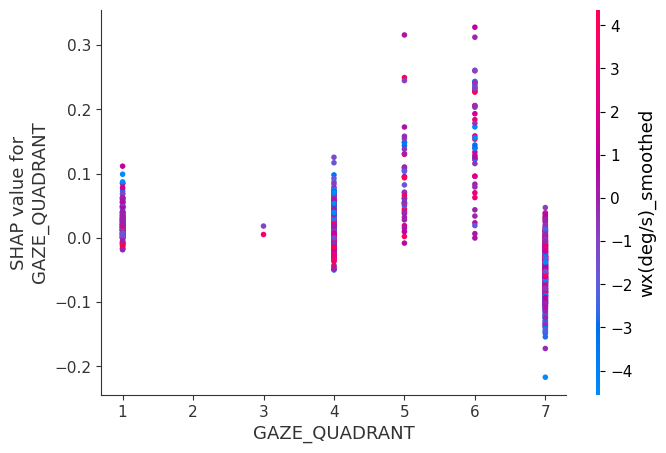

SHAP Dependence Plot for XGB (Shape_road - Original Values, Class 0):


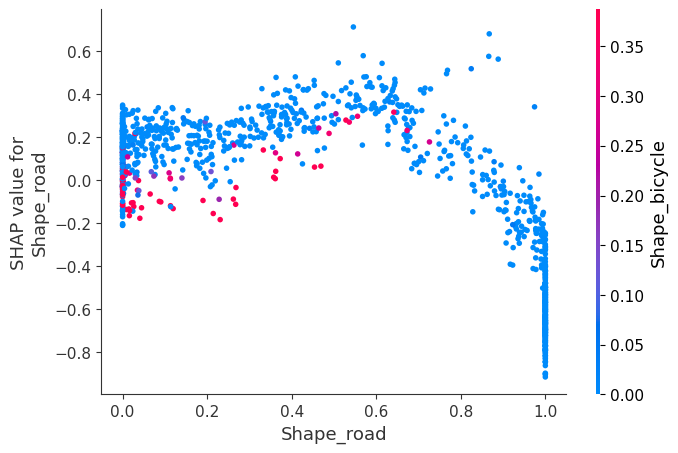

SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 0):


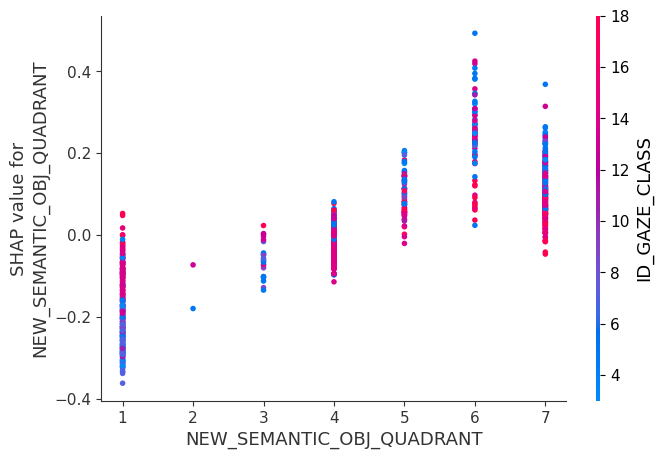

SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 0):


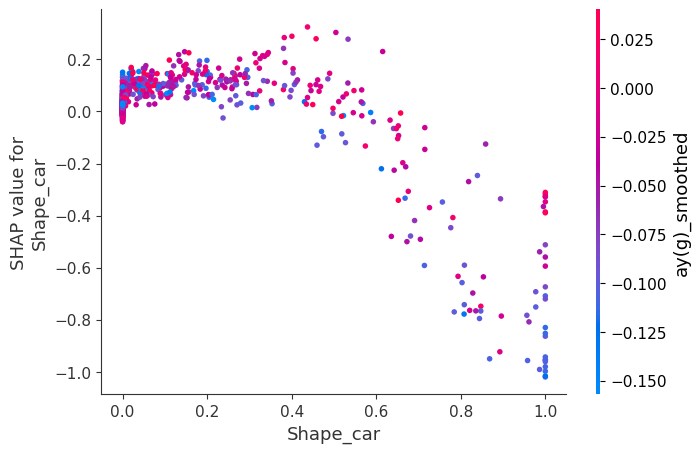

SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 0):


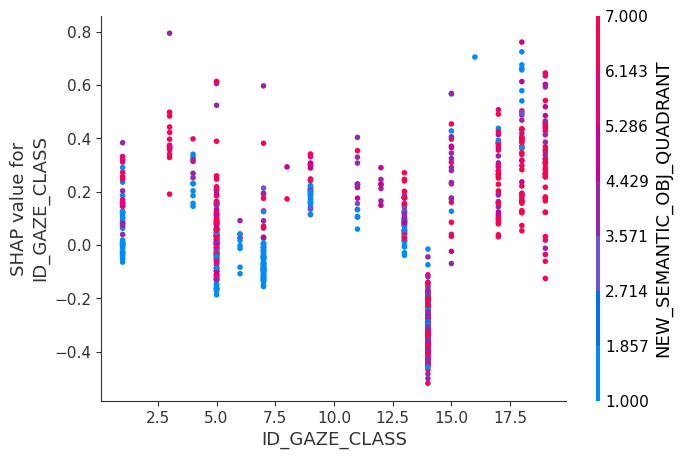

In [21]:
# SHAP Dependence Plot 1
print("SHAP Dependence Plot for XGB (GAZE_QUADRANT  - Original Values, Class 0):")
shap.dependence_plot('GAZE_QUADRANT', shap_values_xgb[:, :, 0], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 2
print("SHAP Dependence Plot for XGB (Shape_road - Original Values, Class 0):")
shap.dependence_plot('Shape_road', shap_values_xgb[:, :, 0], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 3
print("SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 0):")
shap.dependence_plot('NEW_SEMANTIC_OBJ_QUADRANT', shap_values_xgb[:, :, 0], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 4
print("SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 0):")
shap.dependence_plot('Shape_car', shap_values_xgb[:, :, 0], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 4
print("SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 0):")
shap.dependence_plot('ID_GAZE_CLASS', shap_values_xgb[:, :, 0], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)



### Manual Dependence plot for ID_Gaze_class for saccade (0)

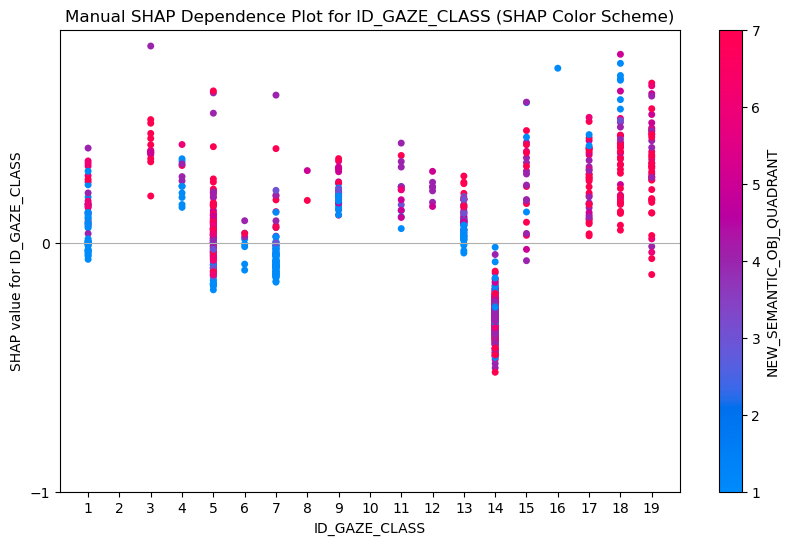

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# Load SHAP's custom colormap for consistency
shap_cmap = shap.plots.colors.red_blue  # SHAP's built-in red-blue colormap

# Ensure that ID_GAZE_CLASS and NEW_SEMANTIC_OBJ_QUADRANT are in int64 format
X_glance_id['ID_GAZE_CLASS'] = X_glance_id['ID_GAZE_CLASS'].astype('int64')
X_glance_id['NEW_SEMANTIC_OBJ_QUADRANT'] = X_glance_id['NEW_SEMANTIC_OBJ_QUADRANT'].astype('int64')

# Extract the SHAP values for the specific class you want to analyze (class 0 here)
shap_values_class_0 = shap_values_xgb[:, :, 0]

# Extract the feature values for ID_GAZE_CLASS
gaze_class_values = X_glance_id.iloc[test_indices]['ID_GAZE_CLASS'].values

# Extract the feature values for NEW_SEMANTIC_OBJ_QUADRANT for coloring
semantic_quadrant_values = X_glance_id.iloc[test_indices]['NEW_SEMANTIC_OBJ_QUADRANT'].values

# Normalize the color values to match SHAP color scheme
norm = plt.Normalize(vmin=semantic_quadrant_values.min(), vmax=semantic_quadrant_values.max())

# Create the manual scatter plot with SHAP color scheme
plt.figure(figsize=(10, 6))
scatter = plt.scatter(gaze_class_values, 
                      shap_values_class_0[:, list(X_glance_id.columns).index('ID_GAZE_CLASS')], 
                      c=semantic_quadrant_values, cmap=shap_cmap, s=25, edgecolor='none', norm=norm)  # Removed outlines using edgecolor='none'

# Customize x-ticks and y-ticks to display whole numbers
plt.xticks(ticks=range(gaze_class_values.min(), gaze_class_values.max() + 1))
plt.yticks(ticks=[round(i, 1) for i in range(int(shap_values_class_0.min()), int(shap_values_class_0.max()) + 1)])

# Add color bar for the semantic quadrant values with SHAP-style colormap
cbar = plt.colorbar(scatter)
cbar.set_label('NEW_SEMANTIC_OBJ_QUADRANT')

# Add labels and title
plt.xlabel('ID_GAZE_CLASS')
plt.ylabel('SHAP value for ID_GAZE_CLASS')
plt.title('Manual SHAP Dependence Plot for ID_GAZE_CLASS (SHAP Color Scheme)')

# Remove only vertical gridlines
plt.grid(True, which='both', axis='y')
plt.grid(False, which='both', axis='x')

# Show the plot
plt.show()


## Dependence plot for Class 1 (Fixation)

SHAP Dependence Plot for XGB (NEW_SEMANTIC_OBJ_QUADRANT - Original Values, Class 1):


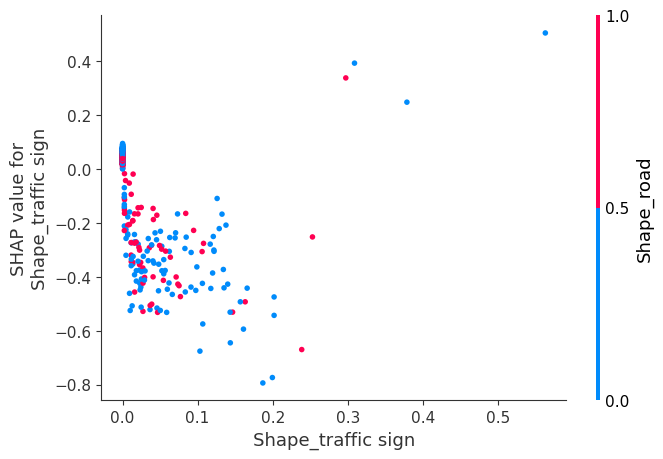

SHAP Dependence Plot for XGB (GAZE_QUADRANT - Original Values, Class 1):


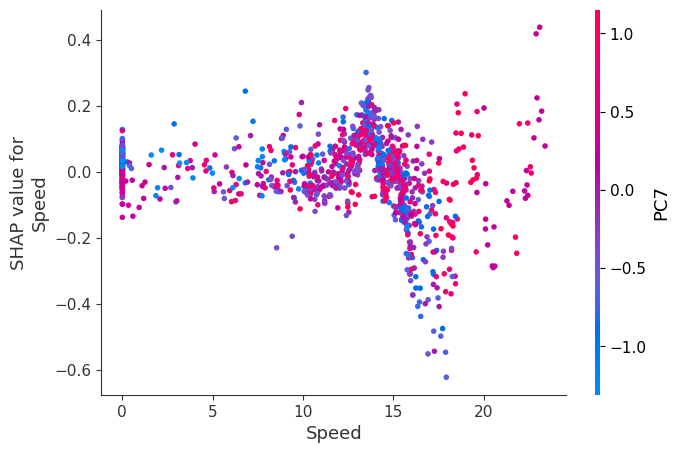

SHAP Dependence Plot for XGB (ID_GAZE_CLASS - Original Values, Class 1):


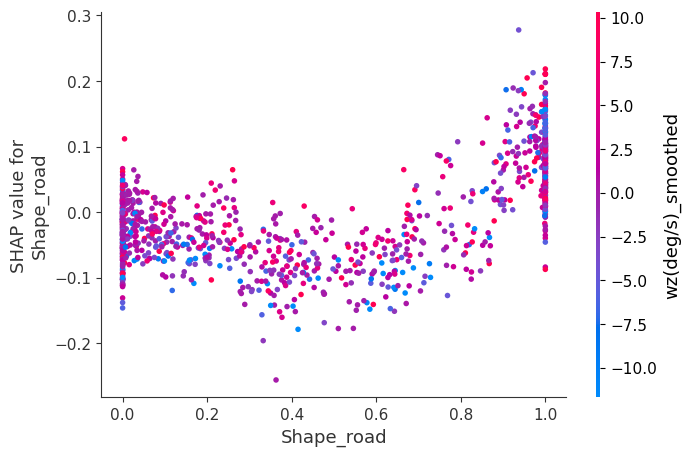

SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 1):


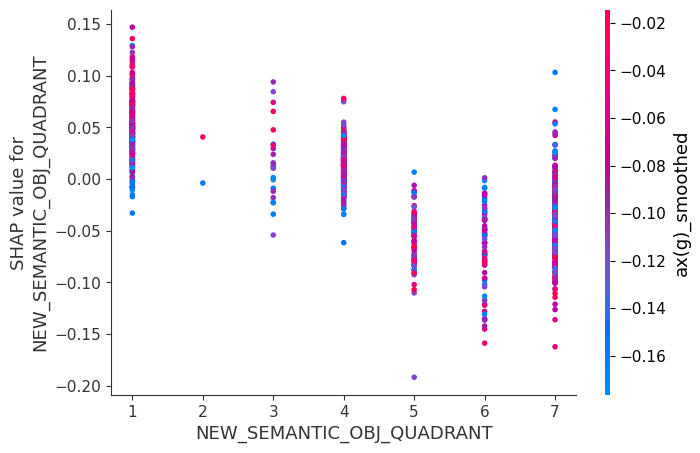

In [23]:

# SHAP Dependence Plot 1
print("SHAP Dependence Plot for XGB (NEW_SEMANTIC_OBJ_QUADRANT - Original Values, Class 1):")
shap.dependence_plot('Shape_traffic sign', shap_values_xgb[:, :, 1], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 2
print("SHAP Dependence Plot for XGB (GAZE_QUADRANT - Original Values, Class 1):")
shap.dependence_plot('Speed', shap_values_xgb[:, :, 1], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 3
print("SHAP Dependence Plot for XGB (ID_GAZE_CLASS - Original Values, Class 1):")
shap.dependence_plot('Shape_road', shap_values_xgb[:, :, 1], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 4
print("SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 1):")
shap.dependence_plot('NEW_SEMANTIC_OBJ_QUADRANT', shap_values_xgb[:, :, 1], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)


## Dependence plot for Class 2 (Long Fixation)

SHAP Dependence Plot for XGB (NEW_SEMANTIC_OBJ_QUADRANT - Original Values, Class 2):


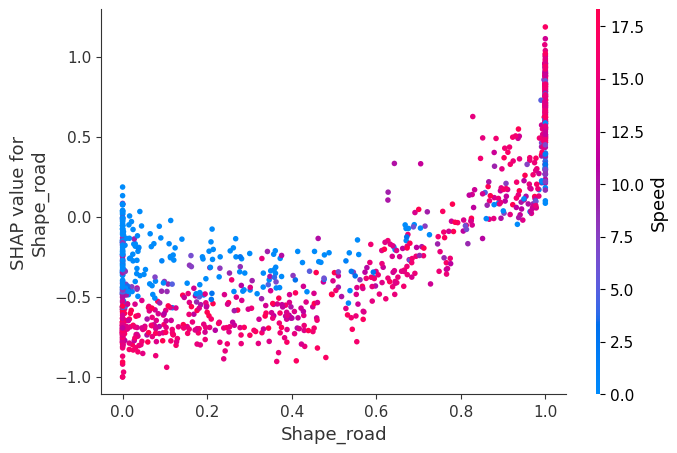

SHAP Dependence Plot for XGB (GAZE_QUADRANT - Original Values, Class 2):


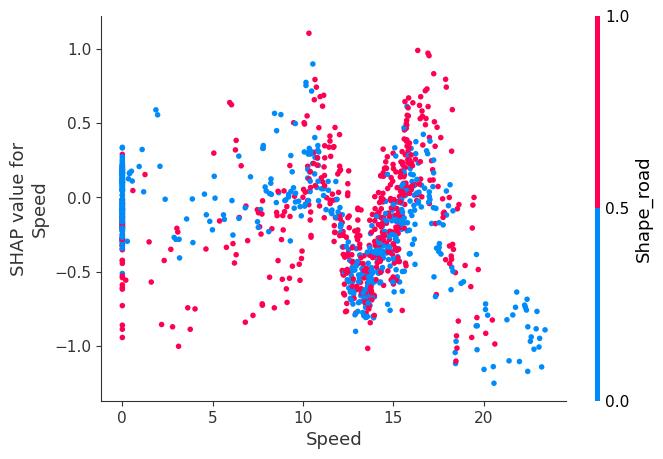

SHAP Dependence Plot for XGB (ID_GAZE_CLASS - Original Values, Class 2):


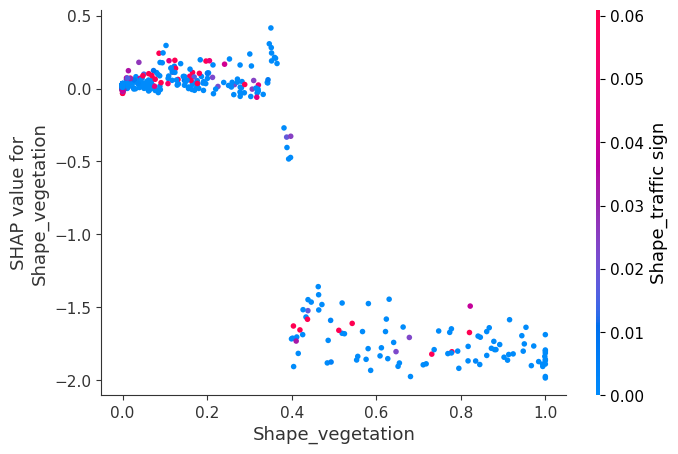

SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 2):


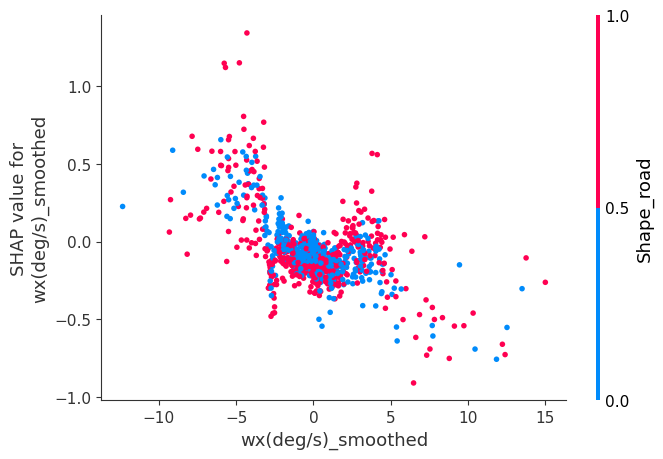

SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 2):


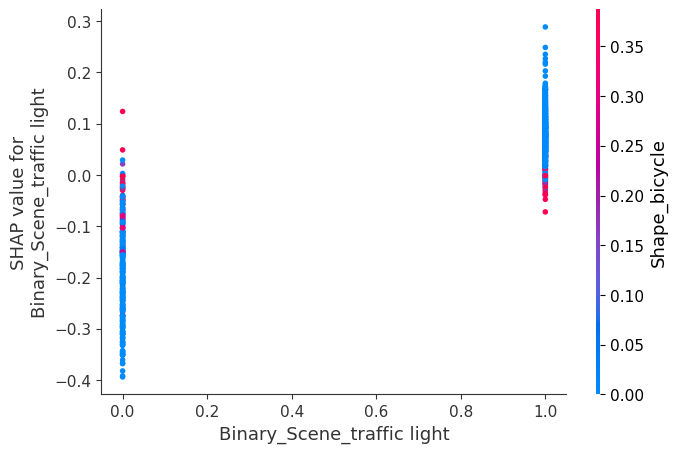

In [24]:

# SHAP Dependence Plot 1
print("SHAP Dependence Plot for XGB (NEW_SEMANTIC_OBJ_QUADRANT - Original Values, Class 2):")
shap.dependence_plot('Shape_road', shap_values_xgb[:, :, 2], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 2
print("SHAP Dependence Plot for XGB (GAZE_QUADRANT - Original Values, Class 2):")
shap.dependence_plot('Speed', shap_values_xgb[:, :, 2], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 3
print("SHAP Dependence Plot for XGB (ID_GAZE_CLASS - Original Values, Class 2):")
shap.dependence_plot('Shape_vegetation', shap_values_xgb[:, :, 2], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 4
print("SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 2):")
shap.dependence_plot('wx(deg/s)_smoothed', shap_values_xgb[:, :, 2], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)

# SHAP Dependence Plot 5
print("SHAP Dependence Plot for XGB (Binary_Scene_bicycle - Original Values, Class 2):")
shap.dependence_plot('Binary_Scene_traffic light', shap_values_xgb[:, :, 2], X_glance_id.iloc[test_indices], feature_names=X_glance_id.columns)
